### AssoExIterate

In [22]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso, AssoExIterate
import pandas as pd
from utils import show_matrix

from cProfile import Profile
from pstats import SortKey, Stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.5 0.2]
[I] seed         : 1024
[I] Using RandomState.


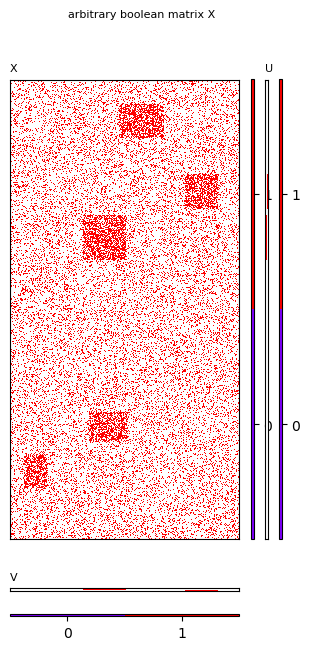

In [23]:
# generate arbitrary Boolean matrix (X)
from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.5, 0.2]
size_range=[0.25, 0.75, 0.25, 1.0]

data = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
data.generate(seed=1234) # if no seed assigned, use time instead
data.add_noise(noise=noise, seed=1024)
data.to_sparse()
data.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

In [24]:
X = data.X

### Load MovieLens data

[I] Sampling axis 0 to size 500
[I]   sampling seed    : 2024
[I]   sampling from    : (943, 1682)
[I]              to    : (500, 1682)
[I] Sampling axis 0 with given indices
[I]   sampling from    : (943, 81)
[I]              to    : (500, 81)
[I] Sampling axis 1 to size 300
[I]   sampling seed    : 2024
[I]   sampling from    : (500, 1682)
[I]              to    : (500, 300)
[I] Sampling axis 1 with given indices
[I]   sampling from    : (26, 1682)
[I]              to    : (26, 300)
[I] Sampling axis 1 with given indices
[I]   sampling from    : (4708, 1682)
[I]              to    : (4708, 300)


[<500x300 sparse matrix of type '<class 'numpy.int32'>'
 	with 8924 stored elements in Compressed Sparse Row format>,
 <500x81 sparse matrix of type '<class 'numpy.float64'>'
 	with 1849 stored elements in Compressed Sparse Row format>,
 <26x300 sparse matrix of type '<class 'numpy.float64'>'
 	with 725 stored elements in Compressed Sparse Row format>,
 <4708x300 sparse matrix of type '<class 'numpy.float64'>'
 	with 1481 stored elements in Compressed Sparse Row format>]

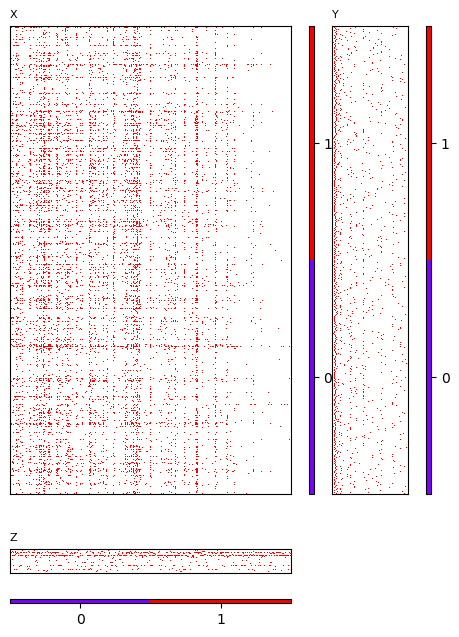

In [25]:
from datasets import MovieLensData, MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size='100k')

data.load()

data.sample(factor_id=0, n_samples=500, seed=2024)
data.sample(factor_id=1, n_samples=300, seed=2024)

display(data.Xs)

X, Y, Z, _ = data.Xs

show_matrix([(X, [0, 0], 'X'), (Y, [0, 1], 'Y'), (Z, [1, 0], 'Z')], 
            colorbar=True, keep_nan=True, discrete=True, center=True, clim=[0, 1], scaling=0.5)

In [26]:
from datasets import NoSplit, RatioSplit

split = RatioSplit(X=X, val_size=0.1, test_size=0.2, seed=2024)
split.negative_sample(train_size=split.pos_train_size, 
                      val_size=split.pos_val_size, 
                      test_size=split.pos_test_size, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 2024
[I]   train_size   : 6246
[I]   val_size     : 893
[I]   test_size    : 1785
[I]   seed         : 2024
[I] RatioSplit, sampling negatives
[I]   all_negatives: 141076
[I]   n_negatives  : 8924
[I]   train_size   : 6246
[I]   val_size     : 893
[I]   test_size    : 1785
[I]   seed         : 2024


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


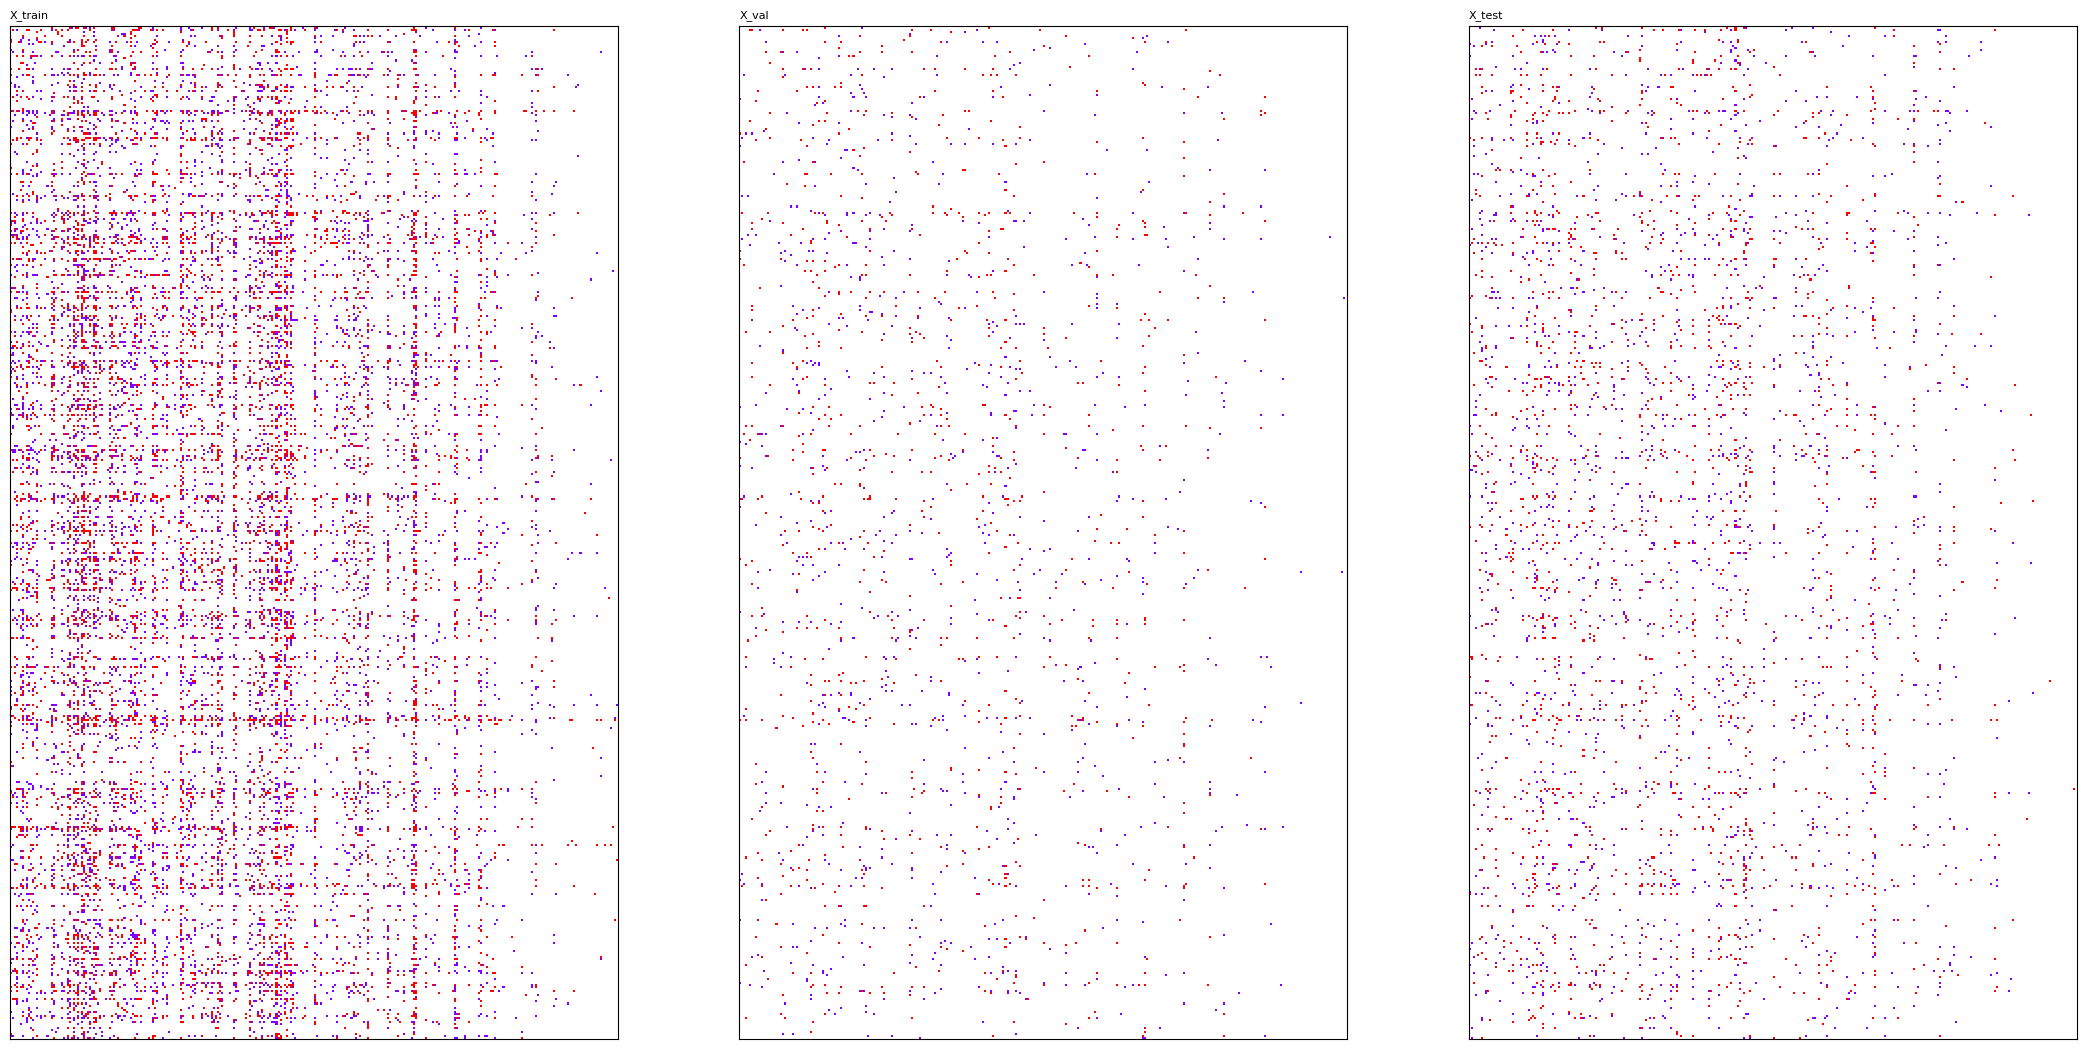

In [27]:
show_matrix(settings=[(X_train, [0, 0], 'X_train'), 
                      (X_val, [0, 1], 'X_val'), 
                      (X_test, [0, 2], 'X_test'), 
                      ], keep_nan=True, clim=[0, 1], discrete=True, center=True)

# AssoExIterate

In [33]:
k = 1
tau = 0.5
w = 0.25

[I] k            : 1
[I] verbose      : False
[I] display      : False
[I] tau          : 0.5
[I] weights      : 0.25
[I] task         : prediction
[I] verbose      : True
[I] display      : True


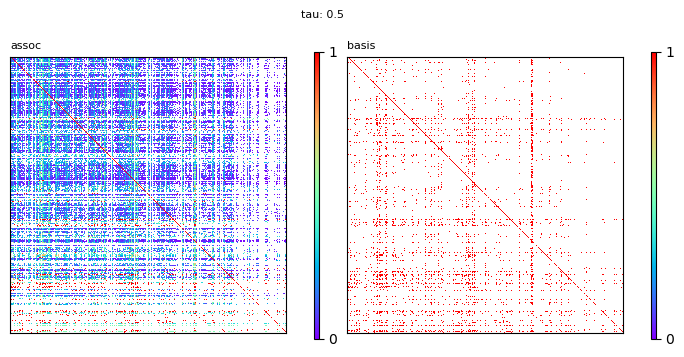

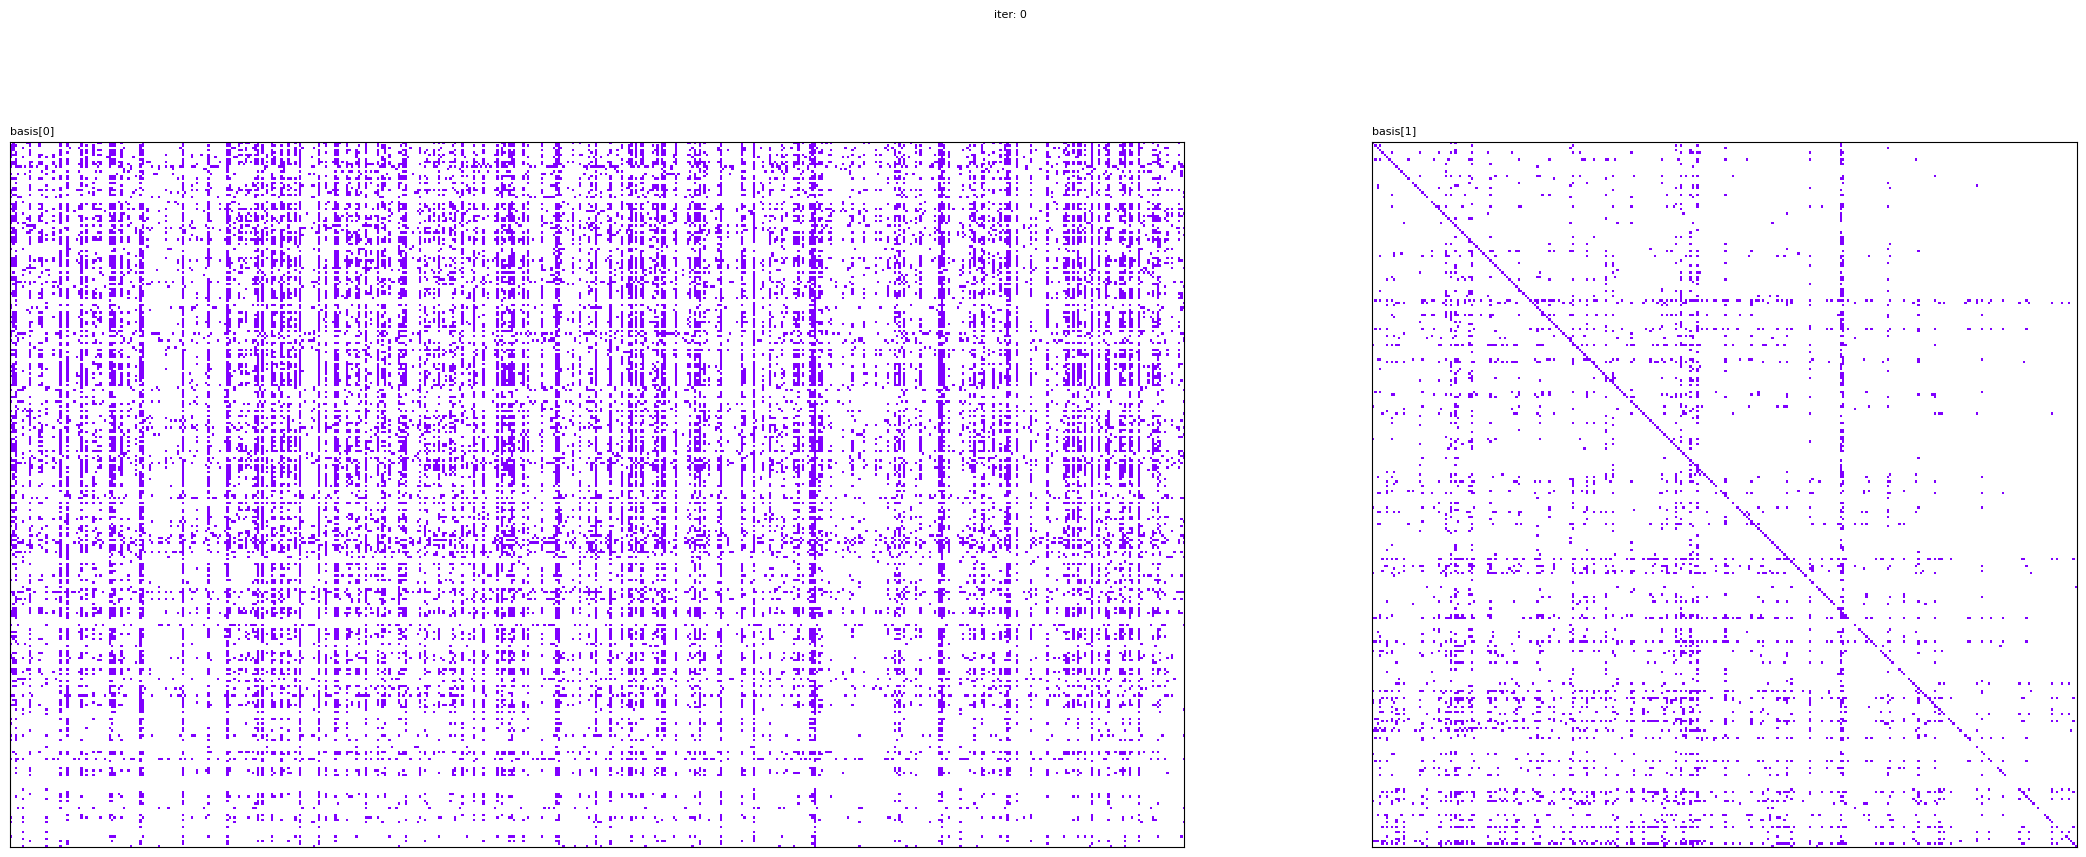

[I] k: 0, updated cols: 0 => 450.0, best_idx: 63


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 110015.80it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,450.000000,0.157861,0.793242,0.558357,0.263320


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5041.79it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,0.135498,0.742331,0.544233,0.229167


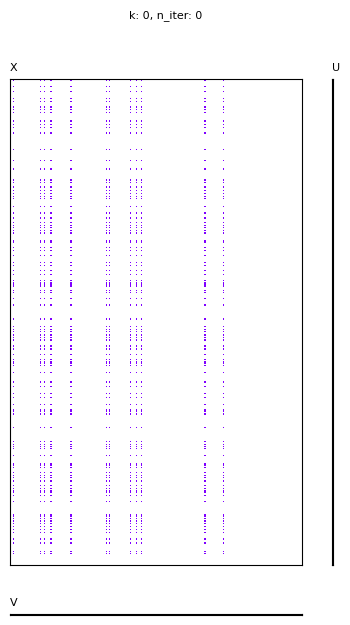

[I] k: 0, updated rows: 450.0 => 641.75, best_idx: 119


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 109519.77it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,28/02/24 11:36:36,0,1,641.750000,0.275216,0.730557,0.586856,0.399814


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5555.07it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,0.135498,0.742331,0.544233,0.229167
1,28/02/24 11:36:36,0,1,0.235162,0.681818,0.562710,0.349709


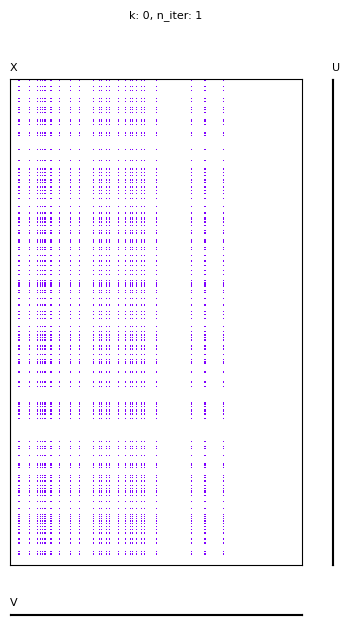

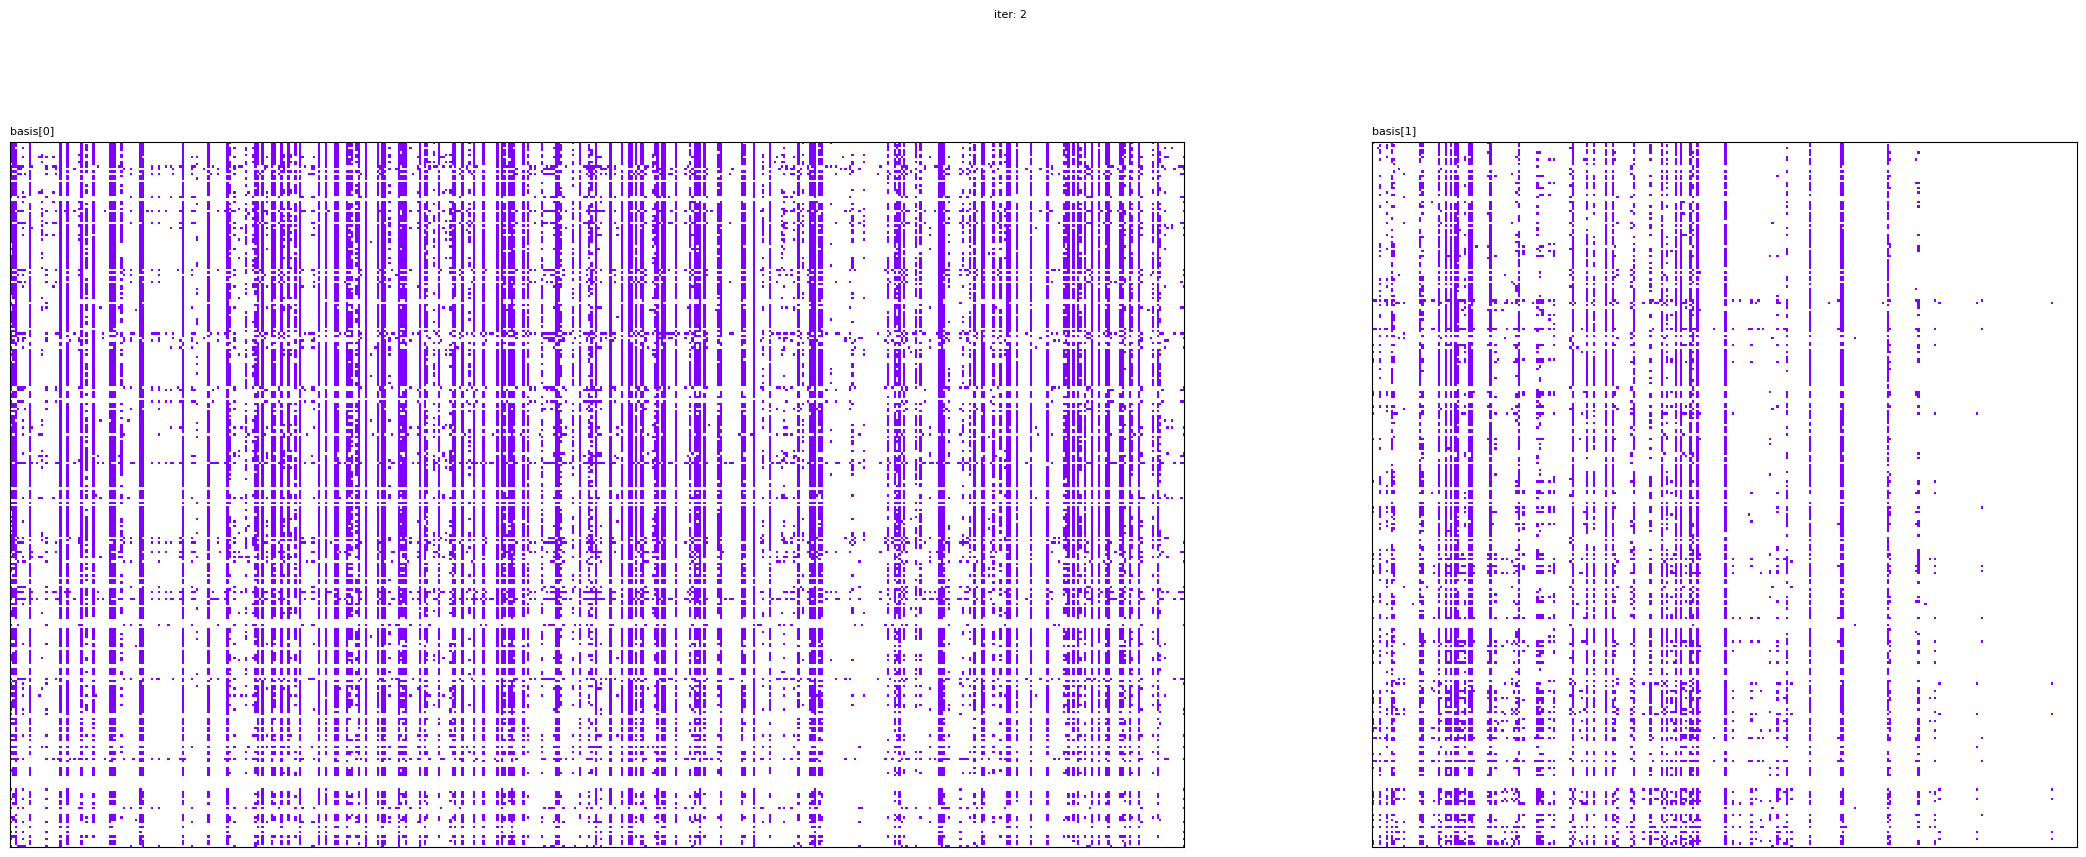

[I] k: 0, updated cols: 641.75 => 680.75, best_idx: 179


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 120293.43it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,28/02/24 11:36:36,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,28/02/24 11:36:38,0,2,680.750000,0.292507,0.723851,0.590458,0.416648


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5465.69it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,0.135498,0.742331,0.544233,0.229167
1,28/02/24 11:36:36,0,1,0.235162,0.681818,0.562710,0.349709
2,28/02/24 11:36:38,0,2,0.253080,0.684848,0.568309,0.369583


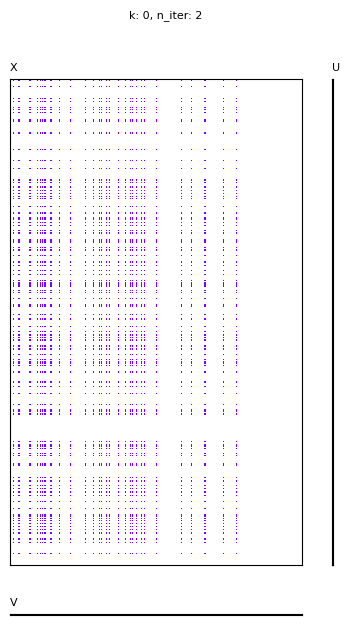

[I] k: 0, updated rows: 680.75 => 684.0, best_idx: 27


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 125121.18it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,28/02/24 11:36:36,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,28/02/24 11:36:38,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,28/02/24 11:36:39,0,3,684.000000,0.286423,0.729608,0.590138,0.411359


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5836.49it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,0.135498,0.742331,0.544233,0.229167
1,28/02/24 11:36:36,0,1,0.235162,0.681818,0.562710,0.349709
2,28/02/24 11:36:38,0,2,0.253080,0.684848,0.568309,0.369583
3,28/02/24 11:36:40,0,3,0.245241,0.680124,0.564950,0.360494


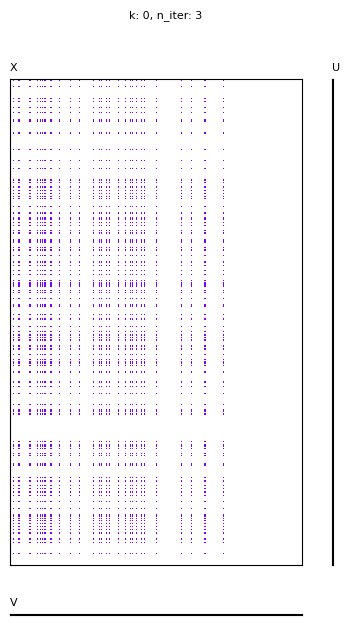

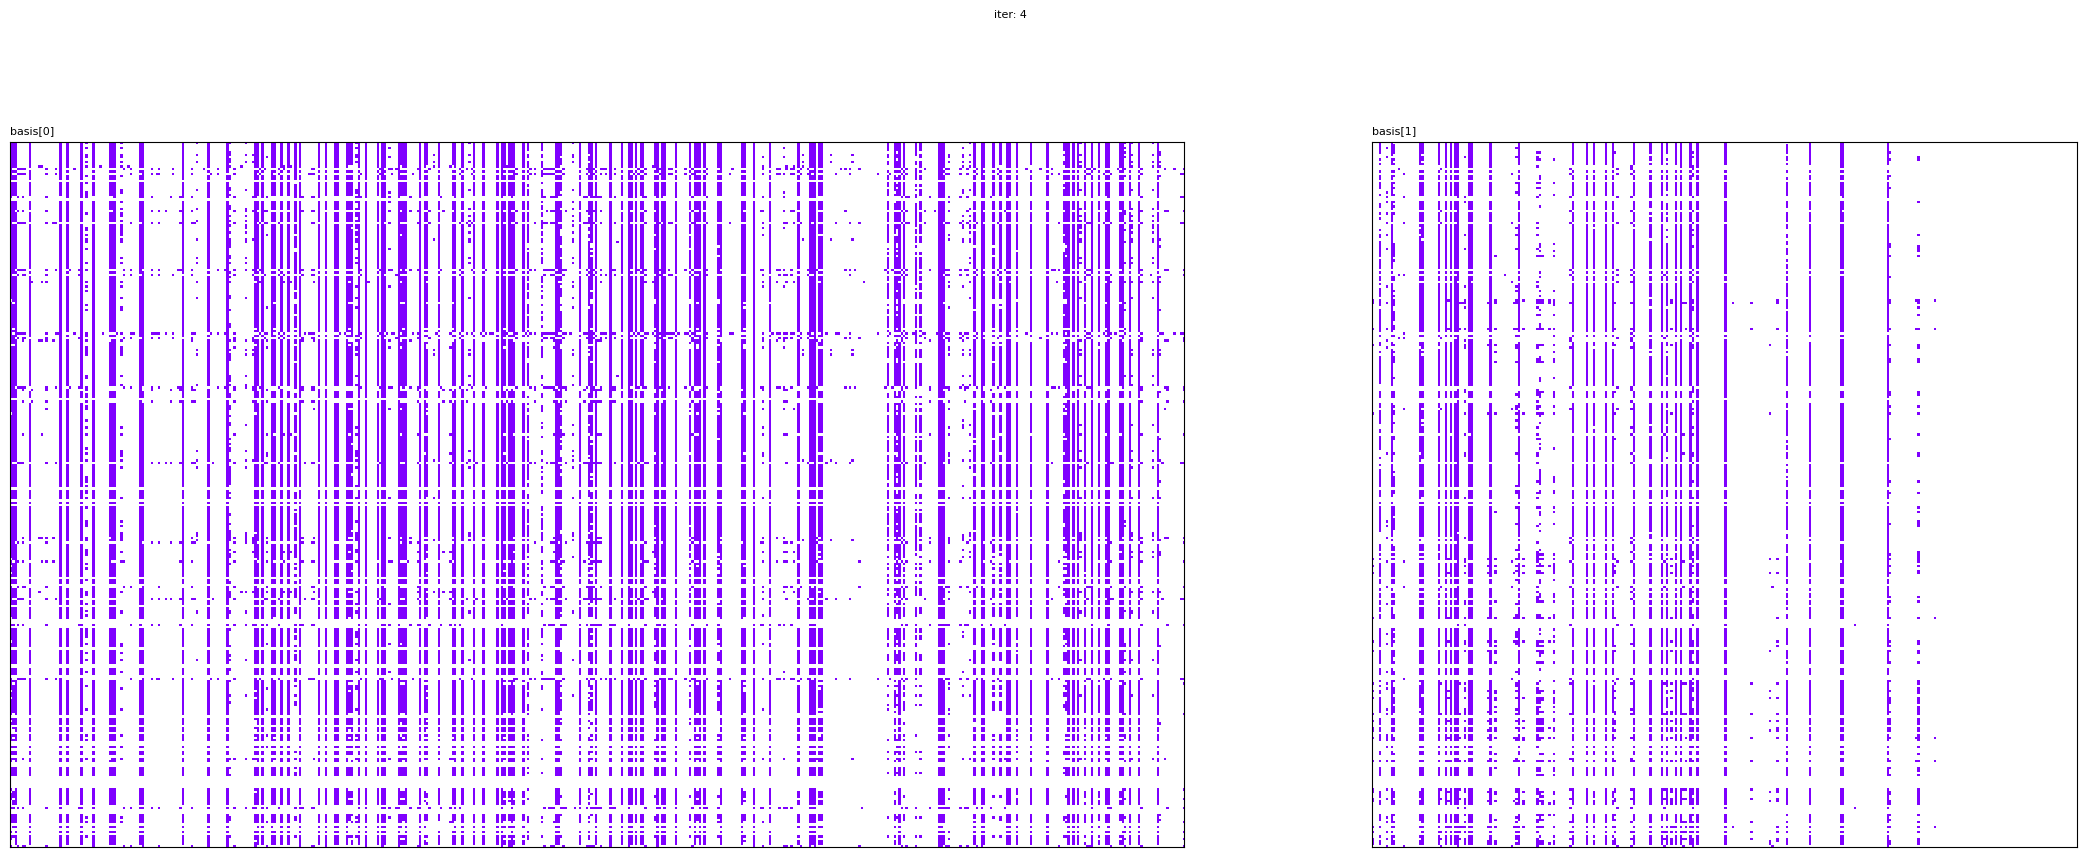

[I] k: 0, updated cols: 684.0 => 684.5, best_idx: 27


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 102168.04it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,28/02/24 11:36:36,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,28/02/24 11:36:38,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,28/02/24 11:36:39,0,3,684.000000,0.286423,0.729608,0.590138,0.411359
4,28/02/24 11:36:41,0,4,684.500000,0.287864,0.728230,0.590218,0.412622


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5880.07it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:34,0,0,0.135498,0.742331,0.544233,0.229167
1,28/02/24 11:36:36,0,1,0.235162,0.681818,0.562710,0.349709
2,28/02/24 11:36:38,0,2,0.253080,0.684848,0.568309,0.369583
3,28/02/24 11:36:40,0,3,0.245241,0.680124,0.564950,0.360494
4,28/02/24 11:36:41,0,4,0.246361,0.676923,0.564390,0.361248


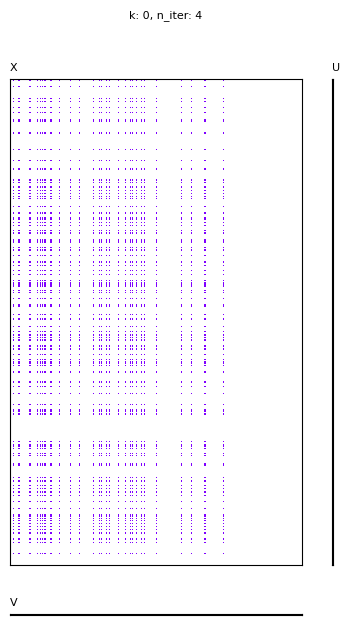

[I] k: 0, break_counter: 0


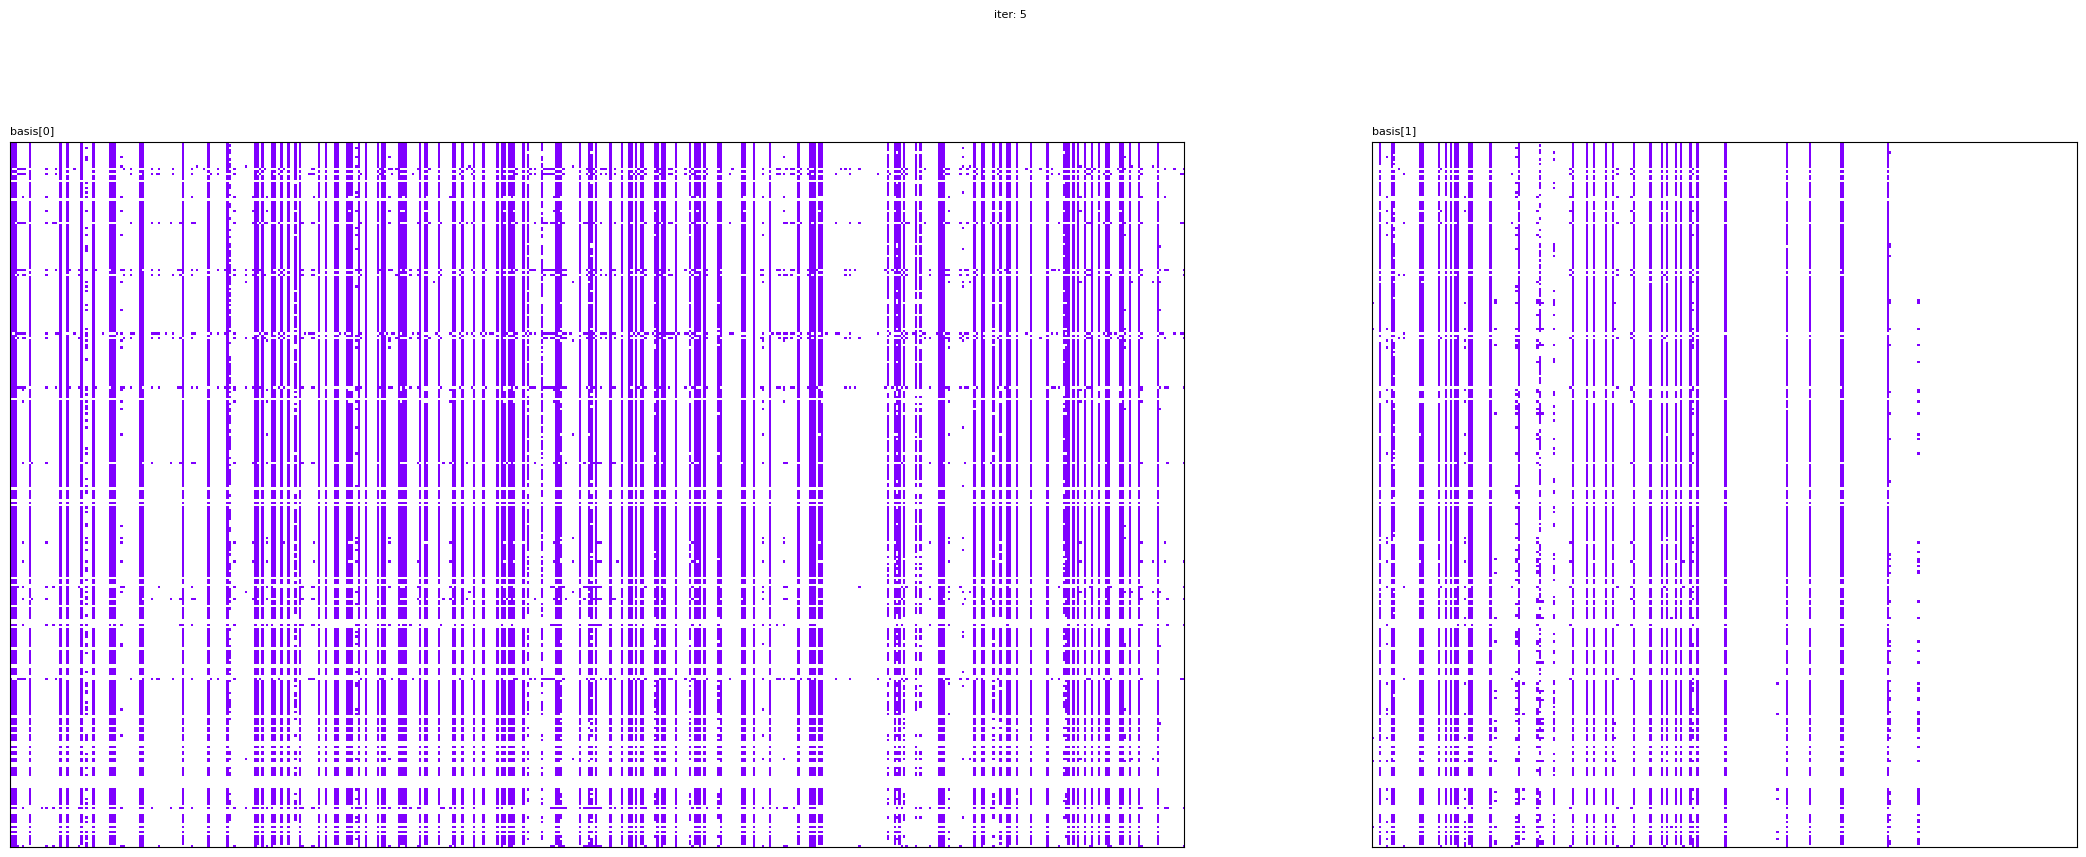

[I] k: 0, break_counter: 1


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 101967.42it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:44,0,5,684.500000,0.287864,0.728230,0.590218,0.412622


[I] Making predictions: 100%|██████████| 1786/1786 [00:00<00:00, 5484.73it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,28/02/24 11:36:45,0,5,0.246361,0.676923,0.564390,0.361248


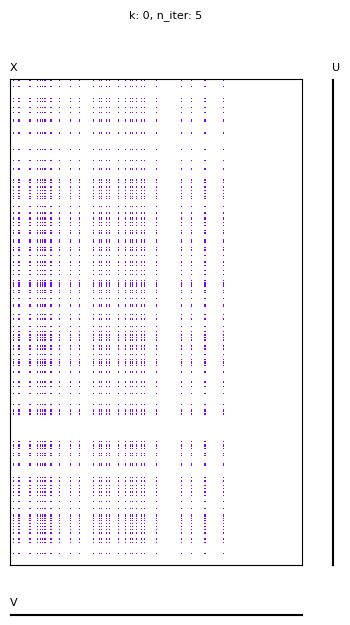

100%|██████████| 1/1 [00:12<00:00, 12.26s/it]


In [55]:
assoi = AssoExIterate(k=k, tau=tau, w=w)
assoi.fit(X_train, X_val, task='prediction', display=True, verbose=True)